<a href="https://colab.research.google.com/github/StratosFair/Mean_Escape_Time/blob/main/OU_process/Plots/OU_param_influence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ornstein-Uhlenbeck process in a ball of $\mathbb{R}^2$ : visualization of trajectories

For $\theta,\sigma,r >0$ some fixed parameters, we let $\Omega := B_r \equiv \{x\in\mathbb R^d : \|x\|< r \}$, and define the process ($d=2$ in our illustration) :

$$\begin{cases} dX_t &= -\theta X_t dt + \sigma dB_t \\
X_0 &= 0 \in \Omega \end{cases} $$

## 1) Visualization of the trajectories for different parameter values

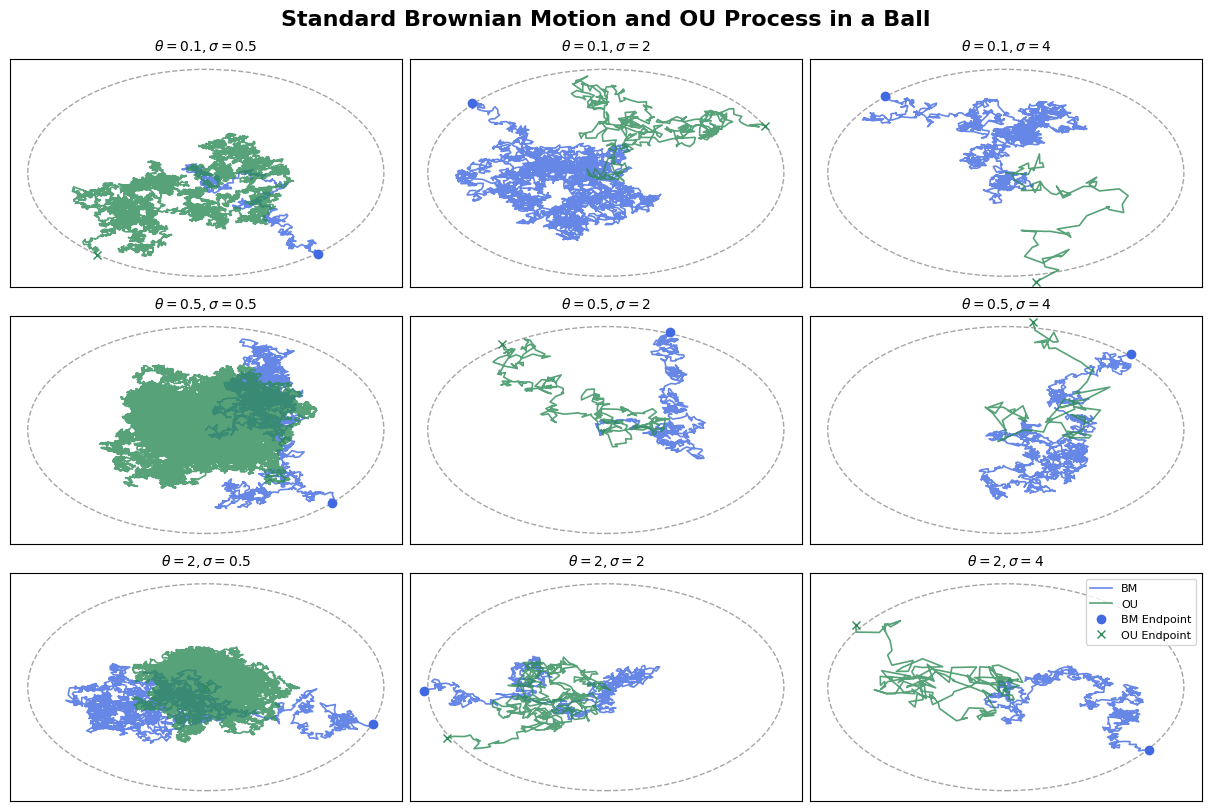

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
r = 2  # radius of the ball
x_0 = np.zeros(2)  # initial position
dt = 1e-3  # time step
time_horizon = 100  # maximum number of time steps
n_steps = int(time_horizon / dt)  # total number of steps

# Range of theta and sigma values to explore
thetas = [0.1, 0.5, 2]
sigmas = [0.5, 2, 4]

def simulate_brownian_motion_ball(r, dt, n_steps):
    """Simulate a standard Brownian motion in a ball."""
    bm = np.zeros((n_steps, 2))
    for i in range(1, n_steps):
        update = np.random.normal(scale=np.sqrt(dt), size=2)
        bm[i] = bm[i - 1] + update
        if np.linalg.norm(bm[i]) >= r:
            bm = bm[:i + 1]  # truncate the trajectory
            break
    return bm

def simulate_ou_process_ball(r, theta, sigma, dt, n_steps):
    """Simulate an Ornstein-Uhlenbeck process in a ball."""
    ou = np.zeros((n_steps, 2))
    for i in range(1, n_steps):
        drift = -theta * ou[i - 1] * dt
        diffusion = sigma * np.random.normal(scale=np.sqrt(dt), size=2)
        ou[i] = ou[i - 1] + drift + diffusion
        if np.linalg.norm(ou[i]) >= r:
            ou = ou[:i + 1]  # truncate the trajectory
            break
    return ou

# Plot results for all combinations of theta and sigma
fig, axes = plt.subplots(len(thetas), len(sigmas), figsize=(12, 8), constrained_layout=True)
fig.suptitle("Standard Brownian Motion and OU Process in a Ball", fontsize=16, weight="bold")

for i, theta in enumerate(thetas):
    for j, sigma in enumerate(sigmas):
        # Simulate processes
        bm = simulate_brownian_motion_ball(r, dt, n_steps)
        ou = simulate_ou_process_ball(r, theta, sigma, dt, n_steps)

        # Plot trajectories
        ax = axes[i, j]
        ax.plot(bm[:, 0], bm[:, 1], c='royalblue', label="BM", alpha=0.8, lw=1.2)
        ax.plot(ou[:, 0], ou[:, 1], c='seagreen', label="OU", alpha=0.8, lw=1.2)
        ax.plot(bm[-1, 0], bm[-1, 1], 'o', color='royalblue', markersize=6, label="BM Endpoint")
        ax.plot(ou[-1, 0], ou[-1, 1], 'x', color='seagreen', markersize=6, label="OU Endpoint")

        # Draw the circle
        circle = plt.Circle((0, 0), r, fill=False, edgecolor='gray', linestyle='--', alpha=0.7, lw=1)
        ax.add_artist(circle)
        ax.set_xlim([-1.1 * r, 1.1 * r])
        ax.set_ylim([-1.1 * r, 1.1 * r])

        # Titles and labels
        ax.set_title(f"$\\theta={theta}, \\sigma={sigma}$", fontsize=10, weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
        if i == len(thetas) - 1 and j == len(sigmas) - 1:  # Add legend to the last subplot
            ax.legend(loc="upper right", fontsize=8)

plt.show()

In [ ]:
#parameters of simulation
r = 2
x_0 = np.zeros(2)
dt = 10**-3
max_steps = 500/dt

# Brownian motion in a ball
bm_1 = [x_0[0]]
bm_2 = [x_0[1]]
current_norm = 0
current_steps = 1

while current_norm < r :
    update_1, update_2 = np.random.normal(scale=np.sqrt(dt)), np.random.normal(scale=np.sqrt(dt))
    bm_1.append(bm_1[-1] + update_1)
    bm_2.append(bm_2[-1] + update_2)
    current_norm = np.linalg.norm((bm_1[-1],bm_2[-1]))
    if current_steps >= max_steps - 1 :
        break
    current_steps += 1

In [ ]:
#Ornstein-Uhlenbeck process in same ball
sigma = 0.25
theta = 1
ou_1 = [x_0[0]]
ou_2 = [x_0[1]]
current_norm = 0
current_steps = 1

while current_norm < r :
    update_1 = -theta*ou_1[-1]*dt + sigma*np.random.normal(scale=np.sqrt(dt))
    update_2 = -theta*ou_2[-1]*dt  + sigma*np.random.normal(scale=np.sqrt(dt))
    ou_1.append(ou_1[-1] + update_1)
    ou_2.append(ou_2[-1] + update_2)
    current_norm = np.linalg.norm((ou_1[-1],ou_2[-1]))
    if current_steps >= max_steps - 1 :
        break
    current_steps += 1

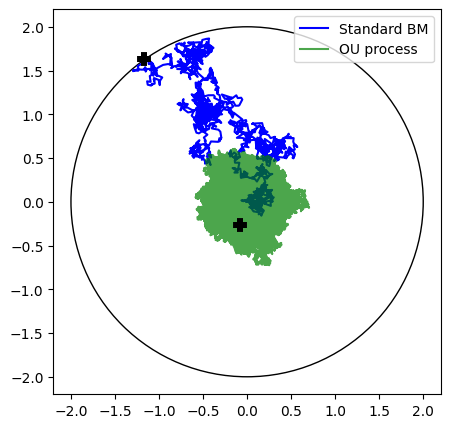

In [ ]:
#plotting the brownian motion and OU process together

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(bm_1,bm_2, c='b', label = "Standard BM")
ax.plot(ou_1, ou_2, c='g', alpha=0.7, label = "OU process")
ax.plot(ou_1[-1], ou_2[-1], 'k+', mew=10, ms=5)
ax.plot(bm_1[-1], bm_2[-1], 'k+', mew=10, ms=5)
circle = plt.Circle((0,0),r , fill = False)
ax.add_artist(circle)
ax.set_xlim([-1.1*r, 1.1*r])
ax.set_ylim([-1.1*r, 1.1*r])
ax.legend()
#plt.autoscale(False, tight=False)
plt.show()

##2) Visualization of the solution for different parameter values

/tmp/ipython-input-7-3167239111.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(cx, cy, 'k-', linestyle="--", alpha=0.5, linewidth=1.2)


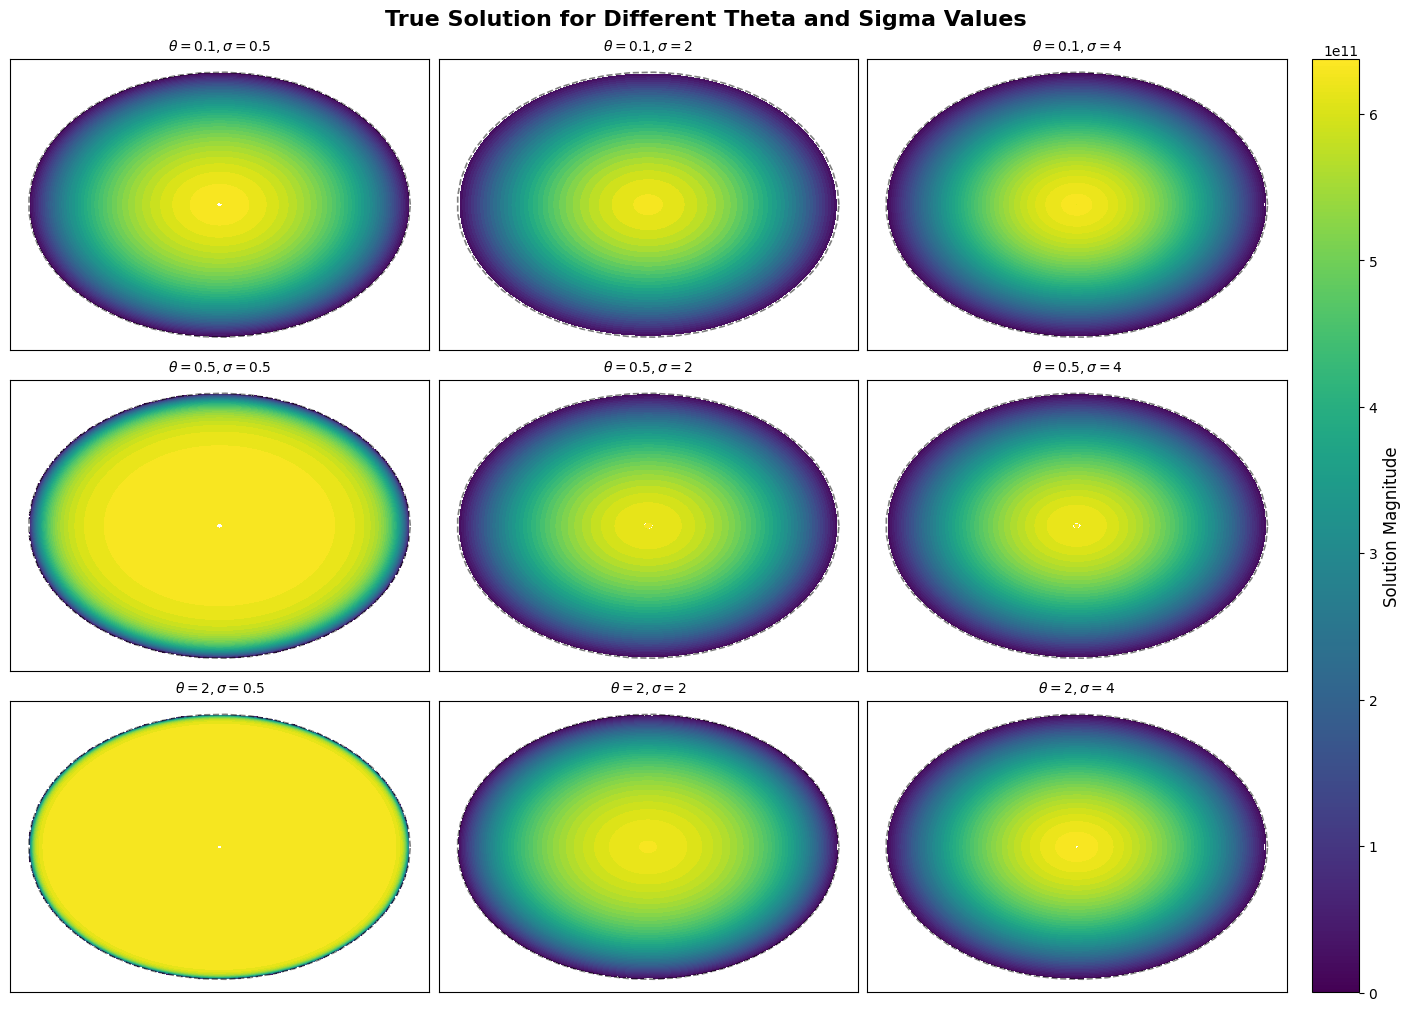

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, special

# Parameters
radius = 2
thetas = [0.1, 0.5, 2]
sigmas = [0.5, 2, 4]

# Function to compute the true solution
def true_solution(x, y, theta, sigma):
    lambda_ = theta / sigma**2
    rho = np.sqrt(x**2 + y**2)
    integral, _ = integrate.quad(
        lambda t: np.exp(lambda_ * t**2) * special.gammainc(1, lambda_ * t**2) / t,
        rho, radius,
    )
    return integral / theta

# Make the true_solution compatible with numpy arrays
def true_solution_vectorized(x, y, theta, sigma):
    return np.vectorize(true_solution)(x, y, theta, sigma)

# Spatial grid
n_points = 300
tt = np.linspace(-1, 1, n_points) * radius
xx, yy = np.meshgrid(tt, tt)
xx, yy = np.where(xx**2 + yy**2 <= radius**2, xx, 0), np.where(xx**2 + yy**2 <= radius**2, yy, 0)

# Create a subplot grid for all combinations of thetas and sigmas
fig, axes = plt.subplots(len(thetas), len(sigmas), figsize=(14, 10), constrained_layout=True)
fig.suptitle("True Solution for Different Theta and Sigma Values", fontsize=16, weight="bold")

# Plot solutions for each (theta, sigma) combination
all_zz = []  # Collect all zz values for color bar scaling
for i, theta in enumerate(thetas):
    for j, sigma in enumerate(sigmas):
        zz = true_solution_vectorized(xx, yy, theta, sigma)
        all_zz.append(zz)
        ax = axes[i, j]
        contour = ax.contourf(xx, yy, zz, levels=50, cmap="viridis")

        # Circle
        a = np.linspace(0, 2 * np.pi, 50)
        cx, cy = np.cos(a) * radius, np.sin(a) * radius
        ax.plot(cx, cy, 'k-', linestyle="--", alpha=0.5, linewidth=1.2)

        # Titles and labels
        ax.set_title(f"$\\theta={theta}, \\sigma={sigma}$", fontsize=10, weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Dynamically scale the color bar
min_zz, max_zz = np.min(all_zz), np.max(all_zz)
norm = plt.Normalize(vmin=min_zz, vmax=max_zz)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.05, pad=0.02)
cbar.set_label("Solution Magnitude", fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.formatter.set_powerlimits((0, 0))  # Use scientific notation if needed
cbar.update_ticks()

plt.show()